In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [2]:
df = pd.read_csv('E:\PTDL\shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


# Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.

In [3]:
year_group = df.groupby(df.join_year)
shop_num = pd.DataFrame(year_group['name'].count())
shop_num.columns = ['shop_number']
shop_num

,shop_number
join_year,
2015,4
2016,27
2017,156
2018,87
2019,106
2020,247
2021,119


<AxesSubplot:xlabel='join_year'>

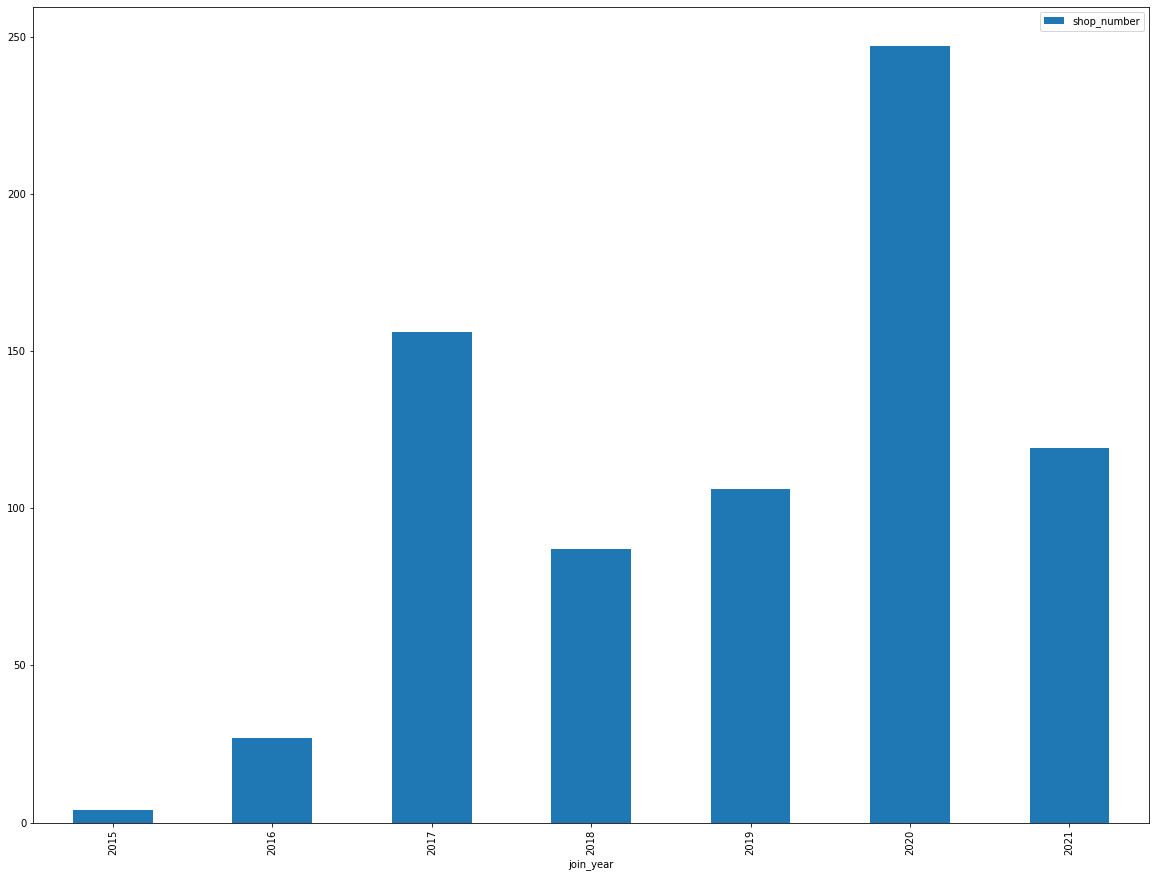

In [4]:
# Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm
shop_num.plot(kind='bar', figsize = (20,15))


In [5]:
df_month_year = df.groupby(['join_year', 'join_month']).size().reset_index() # groupby 2 columns 'join_year' vs 'join_month'

In [6]:
df_month_year = df_month_year.set_axis([*df_month_year.columns[:-1], 'Count'], axis=1, inplace=False) # rename last column to 'Count'

In [7]:
df_month_year

,join_year,join_month,Count
0,2015,October,4
1,2016,June,2
2,2016,May,5
3,2016,November,2
4,2016,October,13
5,2016,September,5
6,2017,April,8
7,2017,August,12
8,2017,December,28
9,2017,February,2


# Sort cùng lúc 2 columns year và month

In [8]:
 # Sort cùng lúc 2 columns year và month
#change the 'join_month' column into a CategoricalDtype    
Months = pd.CategoricalDtype([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
# sort cùng lúc 2 columns year va month
df_month_year = df_month_year.astype({'join_month': Months}).sort_values(['join_year', 'join_month'])
df_month_year

,join_year,join_month,Count
0,2015,October,4
2,2016,May,5
1,2016,June,2
5,2016,September,5
4,2016,October,13
3,2016,November,2
10,2017,January,2
9,2017,February,2
13,2017,March,8
6,2017,April,8


In [9]:
# pivot the dataframe into the correct shape
dfp = pd.pivot_table(data=df_month_year, index=df_month_year['join_year'], columns='join_month', values='Count')
display(dfp.head(10))


join_month,January,February,March,April,May,June,July,August,September,October,November,December
join_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2016,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,5.0,13.0,2.0,NaN
2017,2.0,2.0,8.0,8.0,4.0,7.0,3.0,12.0,36.0,32.0,14.0,28.0
2018,19.0,7.0,12.0,14.0,7.0,3.0,4.0,8.0,2.0,6.0,1.0,4.0
2019,2.0,8.0,17.0,14.0,10.0,9.0,7.0,5.0,5.0,10.0,12.0,7.0
2020,5.0,NaN,5.0,13.0,29.0,22.0,32.0,32.0,39.0,29.0,25.0,16.0
2021,21.0,13.0,33.0,25.0,20.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


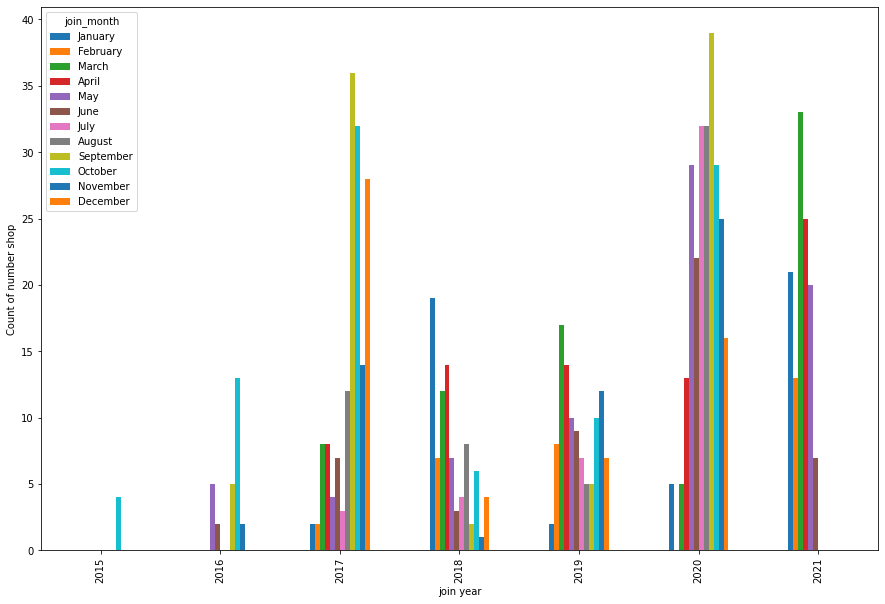

In [10]:
# plot
ax = dfp.plot(kind='bar', figsize=(15,10), ylabel='Count of number shop', xlabel='join year')
#_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [11]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.
df['bins'] = pd.cut(x=df['response_rate'], bins=[1, 20, 40, 60, 80, 100])
df

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop,bins
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0,"(80, 100]"
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0,"(60, 80]"
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0,"(80, 100]"
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0,"(80, 100]"
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0,"(80, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,20210706449182992,2021-07-06,449182992,Yacent_thrift_Clo,May,22,2021,16,115,08:45:30,86,"Legazpi City,Albay",0,32,0,5.00,0,0,"(80, 100]"
742,20210706396605392,2021-07-06,396605392,Akistore.ph,March,3,2021,84,84,08:01:23,91,NaN,1,9,0,4.60,0,0,"(80, 100]"
743,20210706360379308,2021-07-06,360379308,Yzanice Shop,December,20,2020,78,5982,08:46:30,96,NaN,16,463,16,4.75,1,0,"(80, 100]"
744,2021070629392066,2021-07-06,29392066,Clairecvc Shop,August,2,2017,964,44029,12:19:44,73,"Binondo,Metro Manila",1960,103289,3982,4.78,0,0,"(60, 80]"


In [12]:
df['bins'].unique()

[(80.0, 100.0], (60.0, 80.0], (20.0, 40.0], (1.0, 20.0], (40.0, 60.0], NaN]
Categories (5, interval[int64, right]): [(1, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [14]:
group_bins = df.groupby(df.bins)
df_rate_response = pd.DataFrame(group_bins['rating_good'].sum())
df_rate_response.columns = ['rate_good_sum']
df_rate_response

,rate_good_sum
bins,
"(1, 20]",871930
"(20, 40]",3499827
"(40, 60]",8178955
"(60, 80]",26077518
"(80, 100]",33881003


<AxesSubplot:xlabel='response rate group', ylabel='sum of rating good'>

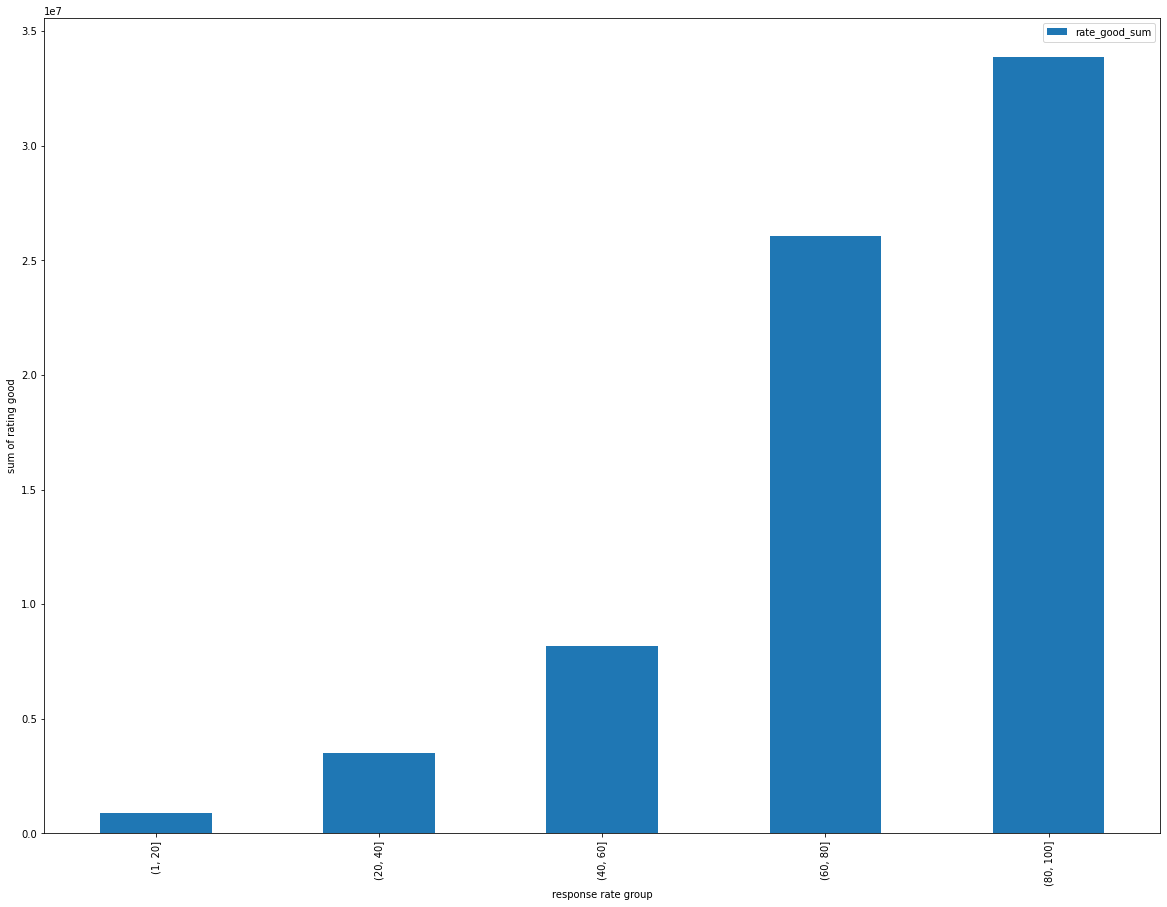

In [18]:
df_rate_response.plot(kind='bar', figsize = (20,15), xlabel = 'response rate group', ylabel = 'sum of rating good')